# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

from numpy.f2py.rules import numpy_version


In [21]:
data = pd.read_csv('data/forestfires.csv')

day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data['day'] = data['day'].map(day_mapping)
data['month'] = data['month'].map(month_mapping)

X_initial = data[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]]
Y_initial = data[["area"]]

X_initial.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [22]:
Y_initial.head()

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [23]:
def h(X, W):
    return np.dot(X, W)

In [24]:
def Error(X, W, Y,lam):
  return np.sum((Y - h(X, W)) ** 2) / (2 * len(X)) + lam * np.sum(W ** 2)
  # return np.sum((Y - h(X, W)) ** 2) / (2 * len(X)) + lam * np.sum(abs(W))

# * np.sum(W ** 2)

In [25]:
def derivada(X, W, Y, lam):
    # write your code here
    # Return a (k+1)x1 vector. This vector contains the derivatives from Loss function
    # respect to all variable w_j
    yh = (Y-h(X, W)).transpose()
    dwj = np.dot(yh, -1 * X).transpose() / len(Y) + 2 * lam * W
    # dwj = np.dot(yh, -1 * X).transpose() / len(Y) +  lam 
    return dwj

In [26]:
def update(W,  dW, alpha):
  # write your code here
  return W - dW * alpha

In [27]:
def train(X, Y, epochs, alfa,lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    # print(W)
    L = Error(X,W,Y,lam)
    print("Inicial", L)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y,lam)
        W = update(W, dW, alfa)
        L = Error(X, W,Y,lam)
        loss.append(L)
        if i % 1000 == 0:
            L = Error(X, W, Y, lam)
            print(f"Epoch {i}, Loss: {L}")
    # print(W)
    return W, loss

In [28]:
#Plotear la ecuación
def conver_matrix(X, p):
  potencia = [i for i in range(p)]
  XX = [ [ e**i for e in X ] for i in potencia]
  return np.array(XX).T



In [29]:
def conver_matrix2(X, p):
    n_cols = X.shape[1]
    XX = np.hstack([X**i for i in range(p)])
    return np.array(XX)  

In [30]:
# x_isi = np.array(X_initial["ISI"])
# y_area = np.log(2 + np.array(Y_initial["area"]))
# 
# x_isi  = (min(x_isi) - x_isi)/(max(x_isi) - min(x_isi))
# y_area  = (min(y_area) - y_area)/(max(y_area) - min(y_area))
# 
# xx_isi = conver_matrix(x_isi,6)

# w , loss = train(xx_isi,y_area, 10000, 0.9, 0.1)
# 
# 
# plt.plot(x_isi,y_area,"*")
# y_aprox = h(xx_isi,w)
# 
# 
# plt.plot(x_isi,y_aprox,"o")

In [31]:

x_vars = np.array(X_initial[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]])

y_area = np.log(1 + np.array(Y_initial["area"]))

min_vals = np.min(x_vars)
max_vals = np.max(x_vars)
x_norm = (x_vars - min_vals) / (max_vals - min_vals)
y_norm  =  (y_area - min(y_area))/(max(y_area) - min(y_area))



(517, 36)


### Multivariate Linear Regression (Implementacion del polinomio erronea)

In [ ]:

xx_vars = conver_matrix2(x_norm, 3)
print(xx_vars.shape)

Inicial 20.38400011172454
Epoch 0, Loss: 17.890518197721185


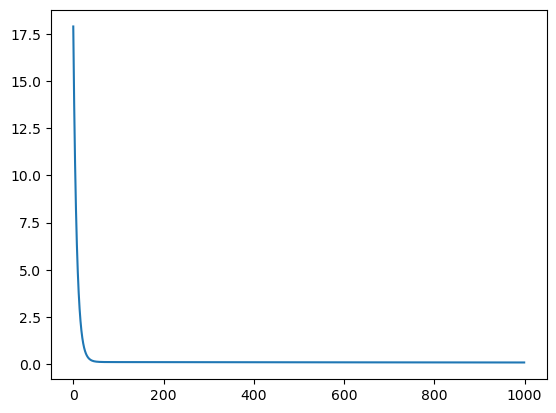

In [32]:
# w , loss = train(xx_vars,y_norm, 1000, 0.08, 0.1)
w , loss = train(xx_vars,y_norm, 1000, 0.005, 0.01)
plt.plot(loss)

# y_aprox = h(xx_isi,w)


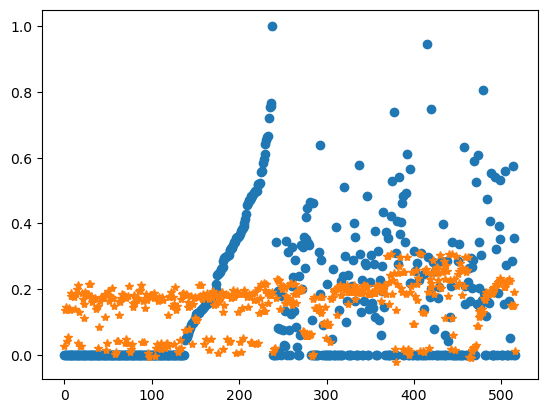

In [33]:
y_aprox = h(xx_vars,w)
# y_aprox = h(X_poly,w)
plt.plot(y_norm, "o")
plt.plot(y_aprox, "*")


In [34]:
from sklearn.metrics import r2_score

den_r2 = (y_norm - np.mean(y_norm))**2
num_r2 = (y_aprox - np.mean(y_norm))**2
r2 = np.sum(num_r2) / np.sum(den_r2)
print(r2)
print(r2_score(y_norm,y_aprox))

0.13733897896224695
-0.08146183126950013


### Multivariate Linear Regression

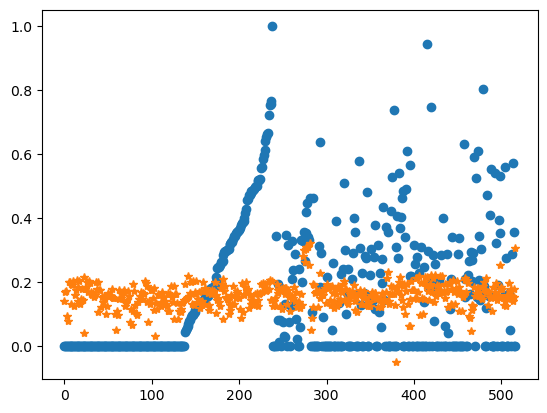

In [35]:
from sklearn import linear_model

# regr = linear_model.LinearRegression()
regr = linear_model.LinearRegression()
regr.fit(x_norm, y_norm)
y_pred = regr.predict(x_norm)
plt.plot(y_norm, "o")
plt.plot(y_pred, "*")

In [36]:
print(r2_score(y_norm,y_pred))

0.03782898186143058


### Multivariate Polynomial Regression

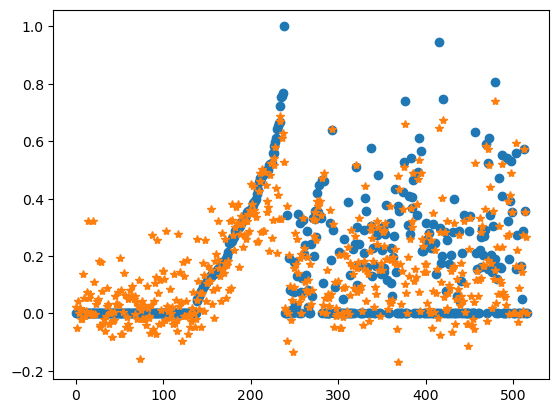

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

poly = PolynomialFeatures(degree=3)

x_vars_poly = poly.fit_transform(x_vars)
min_vals_poly = np.min(x_vars_poly)
max_vals_poly = np.max(x_vars_poly)

X_poly = (x_vars_poly - min_vals_poly) / (max_vals_poly - min_vals_poly)

model = LinearRegression()
model.fit(X_poly, y_norm)
y_pred_pol = model.predict(X_poly)


# y_pred_pol = np.dot(X_poly, model.coef_)

plt.plot(y_norm, "o")
plt.plot(y_pred_pol, "*")

In [39]:
print(r2_score(y_norm,y_pred_pol))
print(model.get_params())

0.7348417028178617
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### Multivariate Polynomial Regression without fit (implementacion del polinomio con libreria)

Inicial 1.594896075348161
Epoch 0, Loss: 1.5936926264992006
Epoch 1000, Loss: 0.9946979178614151
Epoch 2000, Loss: 0.6739217573326423
Epoch 3000, Loss: 0.45944826102087644
Epoch 4000, Loss: 0.3157204396363025
Epoch 5000, Loss: 0.21939966143079384
Epoch 6000, Loss: 0.15484881685684404
Epoch 7000, Loss: 0.11158881777319438
Epoch 8000, Loss: 0.08259712166736108
Epoch 9000, Loss: 0.06316755136712814
Epoch 10000, Loss: 0.05014622754679206
Epoch 11000, Loss: 0.041419541075712024
Epoch 12000, Loss: 0.03557102322829252
Epoch 13000, Loss: 0.03165139927137874
Epoch 14000, Loss: 0.029024490128432737
Epoch 15000, Loss: 0.027263942837827515
Epoch 16000, Loss: 0.02608402364582284
Epoch 17000, Loss: 0.025293238147738917
Epoch 18000, Loss: 0.024763249062869714
Epoch 19000, Loss: 0.0244080458452584


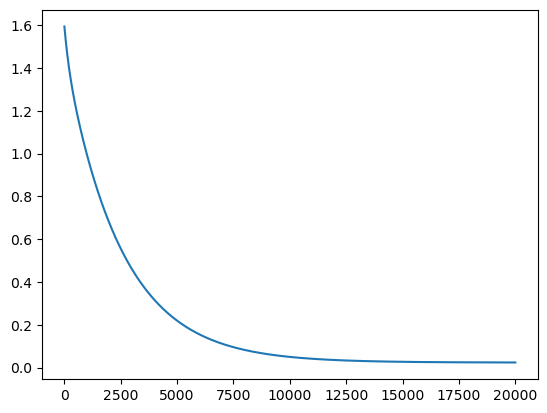

In [40]:

w2 , loss2 = train(X_poly,y_norm, 20000, 0.01, 0.01)
plt.plot(loss2)

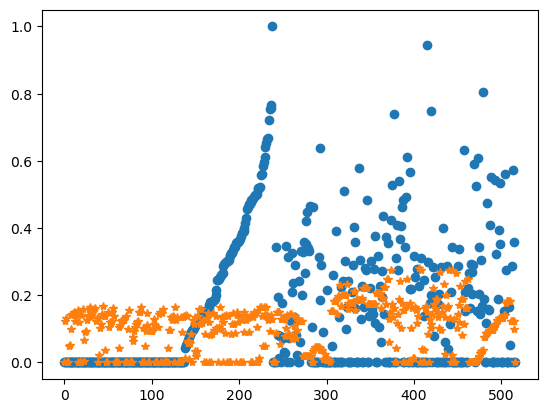

In [41]:
y_aprox2 = h(X_poly,w2)
# y_aprox = h(X_poly,w)
plt.plot(y_norm, "o")
plt.plot(y_aprox2, "*")


In [42]:
print(r2_score(y_norm,y_aprox2))

-0.15221693529546565
